Take a mean of each timestep within the dataset and plot the results.

Prereq: persisted dataset in dask cluster

In [1]:
import iris
from distributed import Client

c = Client('172.31.18.5:8786')
c

<Client: scheduler="172.31.18.5:8786" processes=20 cores=20>

In [2]:
c.list_datasets()

['mogreps']

In [3]:
cubes = c.get_dataset('mogreps')
cubes

dask.bag<bag-fro..., npartitions=696>

In [4]:
sample = cubes.take(1)[0]
print(sample)

visibility_in_air / (m)             (latitude: 600; longitude: 800)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          forecast_period: 3.0 hours
          forecast_reference_time: 2016-01-01 00:00:00
          height: 1.5 m
          realization: 0
          time: 2016-01-01 03:00:00
     Attributes:
          Conventions: CF-1.5
          STASH: m01s03i281
          source: Data from Met Office Unified Model
          um_version: 10.1


In [5]:
means = cubes.map(lambda x: x.collapsed(['latitude', 'longitude'], iris.analysis.MEAN))

In [6]:
p_means = c.persist(means)

In [7]:
p_means.map(lambda x: x.data).compute()[:10]

[array(18429.856),
 array(18527.317333333332),
 array(18624.098133333333),
 array(18684.3136),
 array(18715.778133333333),
 array(18616.228266666665),
 array(18560.017066666667),
 array(18397.9904),
 array(18395.189333333332),
 array(18526.62186666667)]

In [8]:
cl = iris.cube.CubeList(p_means).merge()
cl

[<iris 'Cube' of visibility_in_air / (m) (time: 58)>,
<iris 'Cube' of visibility_in_air / (m) (realization: 11; time: 58)>]

In [9]:
single_member = cl[0]
print(single_member)

visibility_in_air / (m)             (time: 58)
     Dimension coordinates:
          time                           x
     Auxiliary coordinates:
          forecast_period                x
     Scalar coordinates:
          forecast_reference_time: 2016-01-01 00:00:00
          height: 1.5 m
          latitude: 7.62939e-06 degrees, bound=(-89.85, 89.85) degrees
          longitude: 180.225 degrees, bound=(0.225, 360.225) degrees
          realization: 0
     Attributes:
          Conventions: CF-1.5
          STASH: m01s03i281
          source: Data from Met Office Unified Model
          um_version: 10.1
     Cell methods:
          mean: latitude, longitude


In [10]:
multi_member = cl[1]
print(multi_member)

visibility_in_air / (m)             (realization: 11; time: 58)
     Dimension coordinates:
          realization                           x         -
          time                                  -         x
     Auxiliary coordinates:
          forecast_period                       -         x
     Scalar coordinates:
          forecast_reference_time: 2016-01-01 00:00:00
          height: 1.5 m
          latitude: 7.62939e-06 degrees, bound=(-89.85, 89.85) degrees
          longitude: 180.225 degrees, bound=(0.225, 360.225) degrees
     Attributes:
          Conventions: CF-1.5
          STASH: m01s03i281
          source: Data from Met Office Unified Model
          um_version: 10.1
     Cell methods:
          mean: latitude, longitude


In [11]:
import matplotlib.pyplot as plt
import iris.plot as iplt

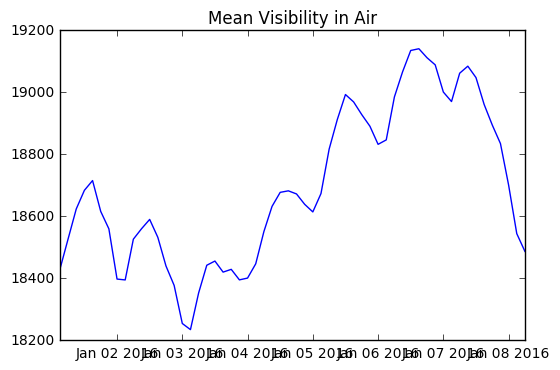

In [12]:
iplt.plot(single_member)
plt.title('Mean Visibility in Air')
iplt.show()


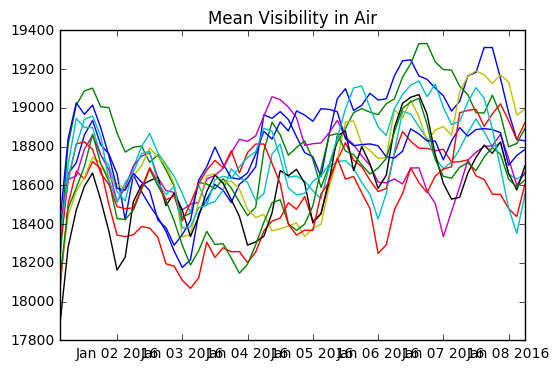

In [13]:
plt.figure()
for member in multi_member.slices(['time']):
    iplt.plot(member)
    
plt.title('Mean Visibility in Air')
iplt.show()